In [1]:
import numpy as np
import pandas as pd
import os

# pa=[38.30,41.11,44.26]
pee=7.6
b=[0,10,15,20,25]
pe = [pee + bi for bi in b]
kappa=2.094215255 
zeta              = 1.66e-4*1e11

current_folder=os.getcwd()

In [2]:
df_ori=pd.read_csv(current_folder+'\\hmc_1043SitesModel.csv')
dfz_bar= df_ori['zbar_2017_1043Sites']
dfz_bar_np=dfz_bar.to_numpy()

## Figure 5

In [3]:
variable_dict = {}
for j in range(5):
    order=j
    os.chdir(current_folder+"\\gams\\p_a_41.11_p_e_{}".format(pe[order]))
    dfz= pd.read_csv('amazon_data_z.dat', delimiter='\t')
    dfz=dfz.drop('T/R ', axis=1)
    dfz_zeronp=dfz.to_numpy()
    dfx= pd.read_csv('amazon_data_x.dat', delimiter='\t')
    dfx=dfx.drop('T   ', axis=1)
    dfx_np =dfx.to_numpy()
    variable_dict[f"results_zper{j}"] = []
    variable_dict[f"results_xagg{j}"] = dfx_np[:51]
    variable_dict[f"results_xagg_100{j}"]=[i*100 for i in variable_dict[f"results_xagg{j}"]]
    for i in range(51):
        result_zper =np.sum(dfz_zeronp[i])/(np.sum(dfz_bar_np)/1e11)
        variable_dict[f"results_zper{j}"].append(result_zper)
        variable_dict[f"results_zper_100{j}"]=[i * 100 for i in variable_dict[f"results_zper{j}"]]


In [4]:
# import matplotlib.pyplot as plt
# time = list(range(0, len(variable_dict[f"results_zper_100{0}"])))
# plt.figure(figsize=(10, 6))
# custom_labels = ["$p^{ee}$=7.6        $b$", "0", "10", "15", "20"]

# plt.plot([], [], ' ', label=custom_labels[0])  
# for i in range(4):  
#     plt.plot(time, variable_dict[f"results_zper_100{i}"], label=custom_labels[i+1], linewidth=4)
# plt.xlabel('Time')
# plt.ylabel('Z(%)')
# plt.xlim(0, max(time)+2)
# plt.yticks([0, 5, 10, 15, 20, 25], ['0', '5', '10', '15', '20', '25'])
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5,frameon=False,fontsize='large')
# # plt.savefig('Figure5_1.png')
# plt.savefig('C:\\Users\\pengyu\\Desktop\\Amazon_draft_2024\\section7_2\\plotPrediction_zShare_78Sites_det.png', format='png', bbox_inches='tight')
# plt.show()

In [5]:
# plt.figure(figsize=(10, 6))
# plt.plot([], [], ' ', label=custom_labels[0])  
# for i in range(4):  
#     plt.plot(time, variable_dict[f"results_xagg_100{i}"], label=custom_labels[i+1], linewidth=4)
# plt.xlabel('Time')
# plt.ylabel('X(billions CO2e)')
# plt.xlim(0, max(time)+2)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5,frameon=False,fontsize='large')
# # plt.savefig('Figure5_2.png')
# plt.savefig('C:\\Users\\pengyu\\Desktop\\Amazon_draft_2024\\section7_2\\plotPrediction_x_78Sites_det.png', format='png', bbox_inches='tight')
# plt.show()

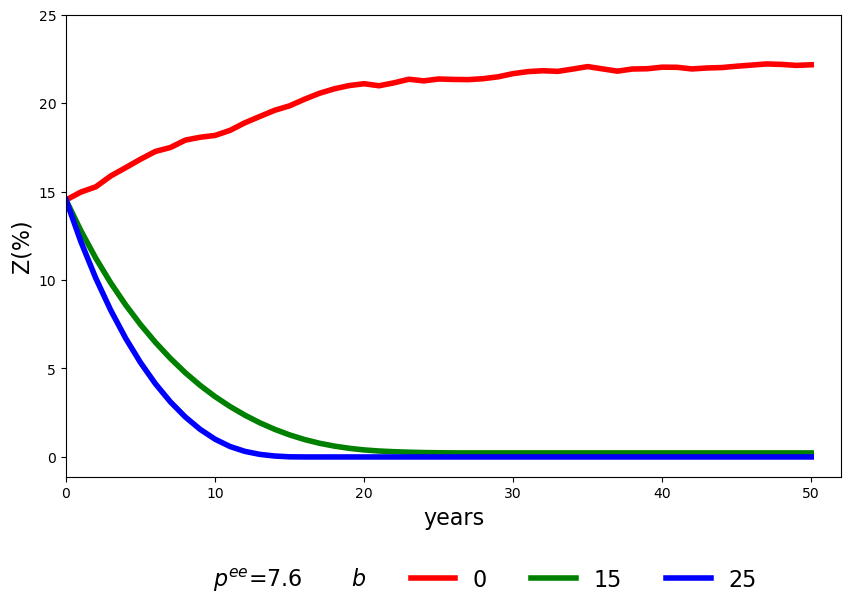

In [6]:
import matplotlib.pyplot as plt
time = list(range(0, len(variable_dict[f"results_zper_100{0}"])))
plt.figure(figsize=(10, 6))
custom_labels = ["$p^{ee}$=7.6       $b$", "0", "10", "15", "20","25"]

plt.plot([], [], ' ', label=custom_labels[0])  
for i in range(5):
    if i in [0,2,4]:
        if i == 0:  
            color='red'
        elif i == 2:
            color='green'
        elif i==4:
            color='blue'        
        plt.plot(time, variable_dict[f"results_zper_100{i}"], label=custom_labels[i+1], linewidth=4,color=color)
plt.xlabel('years',fontsize=16)
plt.ylabel('Z(%)',fontsize=16)
plt.xlim(0, max(time)+2)
plt.yticks([0, 5, 10, 15, 20, 25], ['0', '5', '10', '15', '20', '25'])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5,frameon=False,fontsize=16)
# plt.savefig('Figure5_1.png')
plt.savefig(current_folder+'\\plotPrediction_zShare_1043Sites_det.png', format='png', bbox_inches='tight')
plt.show()

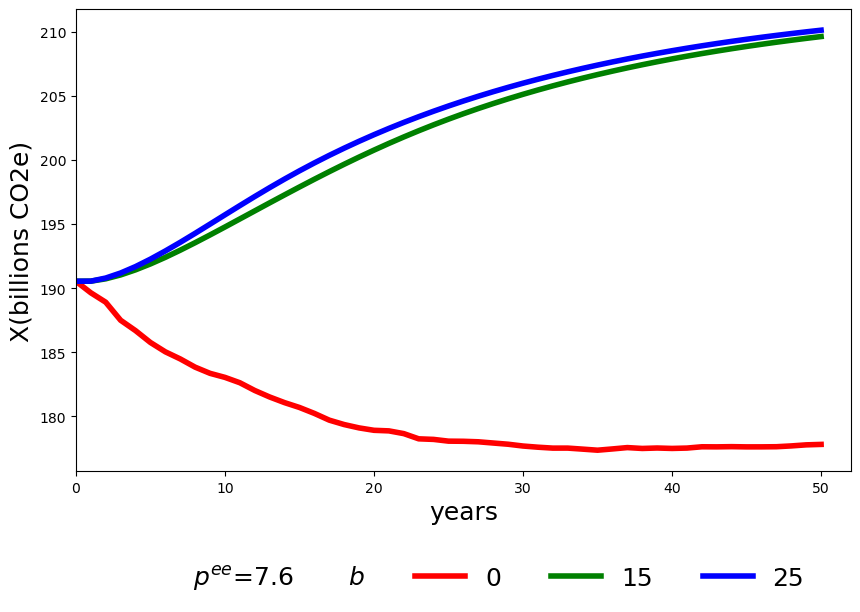

In [7]:
plt.figure(figsize=(10, 6))
plt.plot([], [], ' ', label=custom_labels[0])  
for i in range(5):
    if i in [0,2,4]: 
        if i == 0:  
            color='red'
        elif i == 2:
            color='green'
        elif i==4:
            color='blue'        
        plt.plot(time, variable_dict[f"results_xagg_100{i}"], label=custom_labels[i+1], linewidth=4,color=color)
plt.xlabel('years',fontsize=18)
plt.ylabel('X(billions CO2e)',fontsize=18)
plt.xlim(0, max(time)+2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5,frameon=False,fontsize=18)
# plt.savefig('Figure5_2.png')
plt.savefig(current_folder+'\\plotPrediction_x_1043Sites_det.png', format='png', bbox_inches='tight')
plt.show()